In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
#testing the loaded data

print("Shape of X train is: ", X_train.shape)
print("Shape of Y train is: ", Y_train.shape)
print("Shape of X test is: ", X_test.shape)
print("Shape of Y test is: ", Y_test.shape)

Shape of X train is:  (60000, 28, 28)
Shape of Y train is:  (60000,)
Shape of X test is:  (10000, 28, 28)
Shape of Y test is:  (10000,)


In [7]:
#normalize

X_train, X_test = X_train / 255.0, X_test/255.0
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [9]:
#network define

model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation= 'relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\gayat\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#train model with SGD

model.compile(optimizer=SGD(learning_rate = 0.01),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7268 - loss: 1.0076 - val_accuracy: 0.9078 - val_loss: 0.3185
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9113 - loss: 0.3047 - val_accuracy: 0.9307 - val_loss: 0.2407
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9282 - loss: 0.2481 - val_accuracy: 0.9404 - val_loss: 0.2110
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9398 - loss: 0.2096 - val_accuracy: 0.9457 - val_loss: 0.1830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9492 - loss: 0.1814 - val_accuracy: 0.9497 - val_loss: 0.1675
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9534 - loss: 0.1652 - val_accuracy: 0.9534 - val_loss: 0.1553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9596 - loss: 0.1411 - val_accuracy: 0.9585 - val_loss: 0.1366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9615 - loss: 0.1341 - 

In [17]:
Loss, Accuracy = model.evaluate(X_test, Y_test)

print('Loss: ',Loss)
print('Accuracy: ',Accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1324
Loss:  0.11348827183246613
Accuracy:  0.9660999774932861


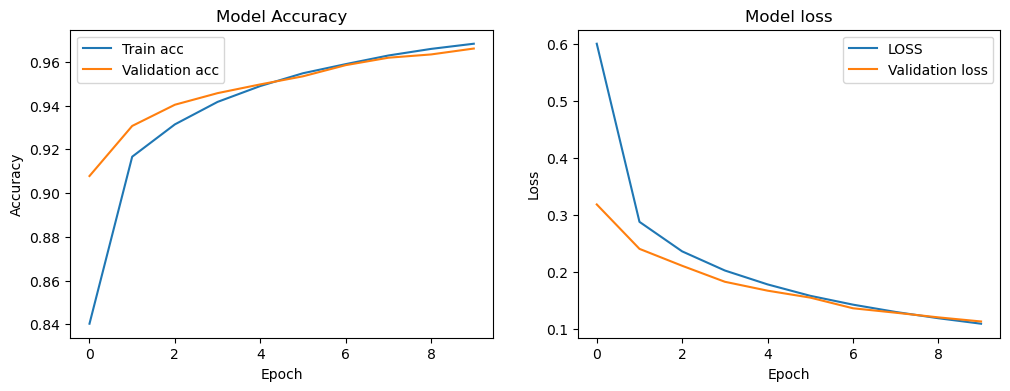

In [25]:
#plot the graph
plt.figure(figsize = (12, 4))

#plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()